In [1]:
import tensorflow as tf 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


(x_train, y_train), (  x_test ,  y_test ) = tf.keras.datasets.mnist.load_data()

In [2]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


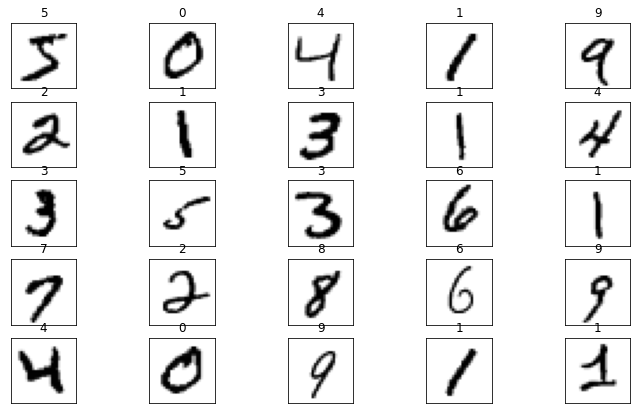

In [3]:
# have a look some picteres
plt.figure(figsize=(12,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title( y_train[i] )
plt.show()

In [4]:
prep_x_train = np.expand_dims(x_train, axis=-1)
prep_x_train = np.repeat( prep_x_train, 3, axis=-1)

#Normalize
prep_x_train = prep_x_train.astype('float32') / 255

# categorial
prep_y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)

prep_x_test = np.expand_dims(x_test, axis=-1)
prep_x_test = np.repeat( prep_x_test, 3, axis=-1)
prep_x_test = prep_x_test.astype('float32') / 255


#prep_y_test = tf.keras.utils.to_categorical(y_test , num_classes=10)

In [5]:
#Initialazing model

input = tf.keras.Input(shape=(28,28,3 ))
efnet = tf.keras.applications.ResNet50(weights='imagenet',
                                             include_top = False, 
                                             input_tensor = input)

gap = tf.keras.layers.GlobalMaxPooling2D()(efnet.output)

output = tf.keras.layers.Dense(10, activation='softmax', use_bias=True)(gap)

model = tf.keras.Model(efnet.input, output)

model.compile(
          loss  = tf.keras.losses.CategoricalCrossentropy(),
          metrics = tf.keras.metrics.CategoricalAccuracy(),
          optimizer = tf.keras.optimizers.Adam())

In [6]:
# fit 
model.fit( prep_x_train, prep_y_train, batch_size=128, epochs=5, verbose = 2)

Epoch 1/5
469/469 - 38s - loss: 0.1270 - categorical_accuracy: 0.9673 - 38s/epoch - 81ms/step
Epoch 2/5
469/469 - 25s - loss: 0.0427 - categorical_accuracy: 0.9876 - 25s/epoch - 53ms/step
Epoch 3/5
469/469 - 25s - loss: 0.0600 - categorical_accuracy: 0.9846 - 25s/epoch - 54ms/step
Epoch 4/5
469/469 - 25s - loss: 0.0351 - categorical_accuracy: 0.9904 - 25s/epoch - 54ms/step
Epoch 5/5
469/469 - 25s - loss: 0.0246 - categorical_accuracy: 0.9930 - 25s/epoch - 54ms/step


In [7]:
#Test score

from sklearn.metrics import accuracy_score

pred = model.predict(prep_x_test)
pred = np.argmax(pred, axis=1)

print( accuracy_score(pred, y_test) )


313/313 [==============================] - 5s 12ms/step
0.9927


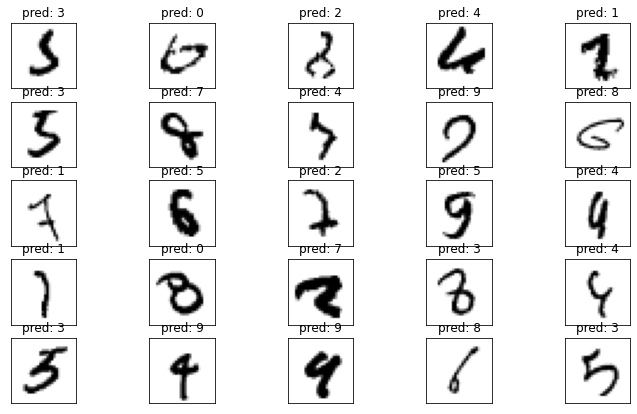

In [8]:
#have a look some mistake
n= 0
iter = 0
plt.figure(figsize=(12,7))
while ( n < 25 ):
    if ( pred[iter] ==  y_test[iter]  ) :
        iter += 1
    else:
        n += 1    
        plt.subplot(5,5, n)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x_test[iter], cmap=plt.cm.binary)
        plt.title( f"pred: {pred[iter]}" )
        iter += 1
plt.show()